In [1]:

import uproot
import pandas as pd
import os
import time
from tqdm import tqdm

def load_root_files_to_df(directory, tree_name="mini", fraction=0.2):
    """
    Load a fraction of the first events from all ROOT files in the given directory into a Pandas DataFrame.

    :param directory: Directory containing the ROOT files.
    :param tree_name: Name of the ROOT tree to extract data from.
    :param fraction: Fraction of the data to load (default is 0.01 for 1%).
    :return: A Pandas DataFrame containing the data from the ROOT files.
    """
    dfs = []
    root_files = [f for f in os.listdir(directory) if f.endswith(".root")]
    
    print(f"Found {len(root_files)} ROOT files in the directory '{directory}'.")
    
    for filename in tqdm(root_files, desc="Loading ROOT files", unit="file"):
        filepath = os.path.join(directory, filename)
        print(f"\nProcessing file: {filename}")
        
        start_time = time.time()
        with uproot.open(filepath) as file:
            tree = file[tree_name]
            num_entries = tree.num_entries
            print(f"  Number of entries in the tree: {num_entries}")
            
            num_to_sample = int(num_entries * fraction)
            print(f"  Sampling the first {num_to_sample} entries.")
            
            # Timing the data extraction
            extract_start_time = time.time()
            df = tree.arrays(library="pd", entry_stop=num_to_sample)
            extract_end_time = time.time()
            print(f"  Time taken to extract data: {extract_end_time - extract_start_time:.2f} seconds.")
            
            dfs.append(df)
        
        end_time = time.time()
        print(f"  Time taken to process file: {end_time - start_time:.2f} seconds.")
    
    print("\nConcatenating all DataFrames...")
    concat_start_time = time.time()
    combined_df = pd.concat(dfs, ignore_index=True)
    concat_end_time = time.time()
    print(f"Time taken to concatenate all DataFrames: {concat_end_time - concat_start_time:.2f} seconds.")
    
    return combined_df

# Directories containing the ROOT files
mc_directory = "usb/GamGam/MC/"
data_directory = "usb/GamGam/Data/"

# Load 1% of the data into separate DataFrames with progress bars
print("Loading MC data...")
mc_df = load_root_files_to_df(mc_directory)
print("Loading Data...")
data_df = load_root_files_to_df(data_directory)

# Check the loaded data
print("MC DataFrame head:")
print(mc_df.head())

print("Data DataFrame head:")
print(data_df.head())


Loading MC data...
Found 5 ROOT files in the directory 'usb/GamGam/MC/'.


Loading ROOT files:   0%|          | 0/5 [00:00<?, ?file/s]


Processing file: mc_341081.ttH125_gamgam.GamGam.root
  Number of entries in the tree: 576491
  Sampling the first 115298 entries.


Loading ROOT files:  20%|██        | 1/5 [00:01<00:05,  1.30s/file]

  Time taken to extract data: 1.28 seconds.
  Time taken to process file: 1.30 seconds.

Processing file: mc_343981.ggH125_gamgam.GamGam.root
  Number of entries in the tree: 1054711
  Sampling the first 210942 entries.


Loading ROOT files:  40%|████      | 2/5 [00:02<00:04,  1.51s/file]

  Time taken to extract data: 1.65 seconds.
  Time taken to process file: 1.66 seconds.

Processing file: mc_345041.VBFH125_gamgam.GamGam.root
  Number of entries in the tree: 497468
  Sampling the first 99493 entries.


Loading ROOT files:  60%|██████    | 3/5 [00:03<00:02,  1.21s/file]

  Time taken to extract data: 0.82 seconds.
  Time taken to process file: 0.84 seconds.

Processing file: mc_345318.WpH125J_Wincl_gamgam.GamGam.root
  Number of entries in the tree: 113765
  Sampling the first 22753 entries.


Loading ROOT files:  80%|████████  | 4/5 [00:04<00:00,  1.01file/s]

  Time taken to extract data: 0.58 seconds.
  Time taken to process file: 0.66 seconds.

Processing file: mc_345319.ZH125J_Zincl_gamgam.GamGam.root
  Number of entries in the tree: 230900
  Sampling the first 46180 entries.


Loading ROOT files: 100%|██████████| 5/5 [00:05<00:00,  1.02s/file]

  Time taken to extract data: 0.64 seconds.
  Time taken to process file: 0.66 seconds.

Concatenating all DataFrames...


Time taken to concatenate all DataFrames: 431.81 seconds.
Loading Data...
Found 3 ROOT files in the directory 'usb/GamGam/Data/'.


Loading ROOT files:   0%|          | 0/3 [00:00<?, ?file/s]


Processing file: data_A.GamGam.root
  Number of entries in the tree: 430344
  Sampling the first 86068 entries.


Loading ROOT files:  33%|███▎      | 1/3 [00:00<00:01,  1.27file/s]

  Time taken to extract data: 0.77 seconds.
  Time taken to process file: 0.79 seconds.

Processing file: data_B.GamGam.root
  Number of entries in the tree: 1528717
  Sampling the first 305743 entries.


Loading ROOT files:  67%|██████▋   | 2/3 [00:03<00:01,  1.67s/file]

  Time taken to extract data: 2.27 seconds.
  Time taken to process file: 2.28 seconds.

Processing file: data_C.GamGam.root
  Number of entries in the tree: 2237187
  Sampling the first 447437 entries.


Loading ROOT files: 100%|██████████| 3/3 [00:05<00:00,  1.84s/file]

  Time taken to extract data: 2.42 seconds.
  Time taken to process file: 2.45 seconds.

Concatenating all DataFrames...


Time taken to concatenate all DataFrames: 683.60 seconds.
MC DataFrame head:
   runNumber  eventNumber  channelNumber  mcWeight  scaleFactor_PILEUP  \
0     284500       674070         341081      -1.0            0.696077   
1     284500       674033         341081      -1.0            0.696077   
2     284500       674129         341081      -1.0            0.696077   
3     284500       674306         341081       1.0            0.750880   
4     284500       674312         341081       1.0            0.750880   

   scaleFactor_ELE  scaleFactor_MUON  scaleFactor_PHOTON  scaleFactor_TAU  \
0          1.00000          0.995968            1.005772              1.0   
1          1.00000          0.995324            1.001342              1.0   
2          1.00000          1.000000            1.007652              1.0   
3          0.94772          1.000000            1.014442              1.0   
4          1.00000          0.999456            1.018067              1.0   

   scaleFactor_

In [2]:
import pandas as pd
import time

# Assuming mc_df and data_df have already been loaded as per the previous code

# Add a new column 'isHiggs' to the MC DataFrame and set it to 1
print("Adding 'isHiggs' column to MC DataFrame...")
start_time = time.time()
mc_df['isHiggs'] = 1
end_time = time.time()
print(f"Time taken to add 'isHiggs' column to MC DataFrame: {end_time - start_time:.2f} seconds")

# Add a new column 'isHiggs' to the Data DataFrame and set it to 0
print("Adding 'isHiggs' column to Data DataFrame...")
start_time = time.time()
data_df['isHiggs'] = 0
end_time = time.time()
print(f"Time taken to add 'isHiggs' column to Data DataFrame: {end_time - start_time:.2f} seconds")

# Concatenate the two DataFrames
print("Concatenating MC and Data DataFrames...")
print(f"Total of {len(mc_df)+len(data_df)} entries")
start_time = time.time()
combined_df = pd.concat([mc_df, data_df], ignore_index=True)
end_time = time.time()
print(f"Time taken to concatenate DataFrames: {end_time - start_time:.2f} seconds")

# Determine the number of Higgs and non-Higgs events
print("Calculating the number of Higgs and non-Higgs events...")
start_time = time.time()
num_higgs = combined_df['isHiggs'].sum()  # Number of Higgs events
num_non_higgs = len(combined_df) - num_higgs  # Number of non-Higgs events
end_time = time.time()
print(f"Number of Higgs events: {num_higgs}")
print(f"Number of non-Higgs events: {num_non_higgs}")
print(f"Time taken to calculate event counts: {end_time - start_time:.2f} seconds")
if False:
    # Ensure 50% ratio by downsampling the majority class
    print("Balancing the DataFrame to ensure a 50% Higgs to non-Higgs ratio...")
    start_time = time.time()
    if num_higgs > num_non_higgs:
        # Downsample Higgs events
        print(f"  Downsampling Higgs events from {num_higgs} to {num_non_higgs}...")
        higgs_df = combined_df[combined_df['isHiggs'] == 1].sample(num_non_higgs, random_state=42)
        non_higgs_df = combined_df[combined_df['isHiggs'] == 0]
    else:
        # Downsample non-Higgs events
        print(f"  Downsampling non-Higgs events from {num_non_higgs} to {num_higgs}...")
        non_higgs_df = combined_df[combined_df['isHiggs'] == 0].sample(num_higgs, random_state=42)
        higgs_df = combined_df[combined_df['isHiggs'] == 1]
    end_time = time.time()
    print(f"Time taken to balance the DataFrame: {end_time - start_time:.2f} seconds")

    # Concatenate the downsampled DataFrames
    print("Concatenating the balanced DataFrames...")
    start_time = time.time()
    balanced_df = pd.concat([higgs_df, non_higgs_df], ignore_index=True)
    end_time = time.time()
    print(f"Time taken to concatenate the balanced DataFrames: {end_time - start_time:.2f} seconds")
else:
    balanced_df = combined_df
# Shuffle the DataFrame to mix the classes
print("Shuffling the balanced DataFrame...")
start_time = time.time()
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
end_time = time.time()
print(f"Time taken to shuffle the balanced DataFrame: {end_time - start_time:.2f} seconds")

# Check the resulting DataFrame
print("Balanced DataFrame head:")
print(balanced_df.head())

# Check the class distribution to confirm 50% ratio
print("Class distribution in the balanced DataFrame:")
print(balanced_df['isHiggs'].value_counts())

# Show the total number of events after balancing
total_events = len(balanced_df)
print(f"\nTotal number of events in the balanced DataFrame: {total_events}")


Adding 'isHiggs' column to MC DataFrame...
Time taken to add 'isHiggs' column to MC DataFrame: 0.01 seconds
Adding 'isHiggs' column to Data DataFrame...
Time taken to add 'isHiggs' column to Data DataFrame: 0.00 seconds
Concatenating MC and Data DataFrames...
Total of 1333914 entries
Time taken to concatenate DataFrames: 930.81 seconds
Calculating the number of Higgs and non-Higgs events...
Number of Higgs events: 494666
Number of non-Higgs events: 839248
Time taken to calculate event counts: 0.00 seconds
Shuffling the balanced DataFrame...
Time taken to shuffle the balanced DataFrame: 2.76 seconds
Balanced DataFrame head:
   runNumber  eventNumber  channelNumber   mcWeight  scaleFactor_PILEUP  \
0     284500      4246580         343981  28.485731            0.696077   
1     301932    242211722         301932   0.000000            0.000000   
2     284500        56490         345041   3.749917            1.214122   
3     301932   -163493589         301932   0.000000            0.0000

In [3]:
import pandas as pd
import awkward as ak
from tqdm import tqdm
import time

def expand_awkward_columns(df):
    """
    Expands columns in a DataFrame that contain awkward arrays into separate columns.
    For example, a column 'photon_E' with values [E1, E2, E3] will be expanded into 
    'photon_E0', 'photon_E1', 'photon_E2'. Shorter lists are padded with zeros.

    :param df: The DataFrame containing columns to expand.
    :return: The DataFrame with expanded columns.
    """
    # Identify columns that contain awkward arrays
    awkward_columns = [col for col in df.columns if isinstance(df[col].iloc[0], ak.Array)]
    
    print(f"Found {len(awkward_columns)} columns with awkward array values.")
    
    for col in tqdm(awkward_columns, desc="Expanding awkward array columns"):
        print(f"\nProcessing column: {col}")
        start_time = time.time()
        
        # Convert the awkward array to a list of lists (ragged array)
        lists = ak.to_list(df[col])
        
        # Determine the maximum length of the lists in the column
        max_len = max(len(sublist) for sublist in lists)
        print(f"  Maximum length of lists in {col}: {max_len}")
        
        # Create new columns for each entry in the list
        new_columns = {}
        for i in range(max_len):
            new_col_name = f"{col}{i}"
            new_columns[new_col_name] = [sublist[i] if i < len(sublist) else 0 for sublist in lists]
        
        # Assign new columns to the DataFrame
        for new_col_name, data in new_columns.items():
            df[new_col_name] = data
        
        # Drop the original column
        df.drop(columns=[col], inplace=True)
        
        end_time = time.time()
        print(f"  Time taken to expand {col}: {end_time - start_time:.2f} seconds.")
    
    return df.copy()

# Assuming `combined_df` is the DataFrame you are working with
print("Expanding awkward array columns in the DataFrame...")
start_time = time.time()
expanded_df = expand_awkward_columns(balanced_df)
end_time = time.time()
print(f"Total time taken to expand awkward array columns: {end_time - start_time:.2f} seconds")

# Check the expanded DataFrame
print("Expanded DataFrame head:")
print(expanded_df.head())


Expanding awkward array columns in the DataFrame...
Found 55 columns with awkward array values.


Expanding awkward array columns:   0%|          | 0/55 [00:00<?, ?it/s]


Processing column: lep_truthMatched
  Maximum length of lists in lep_truthMatched: 4


Expanding awkward array columns:   2%|▏         | 1/55 [00:21<19:09, 21.30s/it]

  Time taken to expand lep_truthMatched: 21.30 seconds.

Processing column: lep_trigMatched
  Maximum length of lists in lep_trigMatched: 4


Expanding awkward array columns:   4%|▎         | 2/55 [00:42<18:56, 21.44s/it]

  Time taken to expand lep_trigMatched: 21.54 seconds.

Processing column: lep_pt
  Maximum length of lists in lep_pt: 4


Expanding awkward array columns:   5%|▌         | 3/55 [01:02<18:04, 20.86s/it]

  Time taken to expand lep_pt: 20.16 seconds.

Processing column: lep_eta
  Maximum length of lists in lep_eta: 4


Expanding awkward array columns:   7%|▋         | 4/55 [01:24<18:03, 21.24s/it]

  Time taken to expand lep_eta: 21.83 seconds.

Processing column: lep_phi
  Maximum length of lists in lep_phi: 4


Expanding awkward array columns:   9%|▉         | 5/55 [01:45<17:30, 21.01s/it]

  Time taken to expand lep_phi: 20.60 seconds.

Processing column: lep_E
  Maximum length of lists in lep_E: 4


Expanding awkward array columns:  11%|█         | 6/55 [02:06<17:13, 21.09s/it]

  Time taken to expand lep_E: 21.25 seconds.

Processing column: lep_z0
  Maximum length of lists in lep_z0: 4


Expanding awkward array columns:  13%|█▎        | 7/55 [02:27<16:42, 20.89s/it]

  Time taken to expand lep_z0: 20.48 seconds.

Processing column: lep_charge
  Maximum length of lists in lep_charge: 4


Expanding awkward array columns:  15%|█▍        | 8/55 [02:48<16:23, 20.92s/it]

  Time taken to expand lep_charge: 20.98 seconds.

Processing column: lep_type
  Maximum length of lists in lep_type: 4


Expanding awkward array columns:  16%|█▋        | 9/55 [03:08<15:55, 20.76s/it]

  Time taken to expand lep_type: 20.42 seconds.

Processing column: lep_isTightID
  Maximum length of lists in lep_isTightID: 4


Expanding awkward array columns:  18%|█▊        | 10/55 [03:30<15:44, 20.99s/it]

  Time taken to expand lep_isTightID: 21.51 seconds.

Processing column: lep_ptcone30
  Maximum length of lists in lep_ptcone30: 4


Expanding awkward array columns:  20%|██        | 11/55 [03:50<15:18, 20.88s/it]

  Time taken to expand lep_ptcone30: 20.62 seconds.

Processing column: lep_etcone20
  Maximum length of lists in lep_etcone20: 4


Expanding awkward array columns:  22%|██▏       | 12/55 [04:12<15:11, 21.19s/it]

  Time taken to expand lep_etcone20: 21.90 seconds.

Processing column: lep_trackd0pvunbiased
  Maximum length of lists in lep_trackd0pvunbiased: 4


Expanding awkward array columns:  24%|██▎       | 13/55 [04:34<14:59, 21.43s/it]

  Time taken to expand lep_trackd0pvunbiased: 21.97 seconds.

Processing column: lep_tracksigd0pvunbiased
  Maximum length of lists in lep_tracksigd0pvunbiased: 4


Expanding awkward array columns:  25%|██▌       | 14/55 [04:56<14:44, 21.57s/it]

  Time taken to expand lep_tracksigd0pvunbiased: 21.92 seconds.

Processing column: jet_pt
  Maximum length of lists in jet_pt: 16


Expanding awkward array columns:  27%|██▋       | 15/55 [05:19<14:45, 22.14s/it]

  Time taken to expand jet_pt: 23.44 seconds.

Processing column: jet_eta
  Maximum length of lists in jet_eta: 16


Expanding awkward array columns:  29%|██▉       | 16/55 [05:44<14:56, 22.98s/it]

  Time taken to expand jet_eta: 24.95 seconds.

Processing column: jet_phi
  Maximum length of lists in jet_phi: 16


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand jet_phi: 24.26 seconds.

Processing column: jet_E
  Maximum length of lists in jet_E: 16


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand jet_E: 24.41 seconds.

Processing column: jet_jvt
  Maximum length of lists in jet_jvt: 16


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand jet_jvt: 25.34 seconds.

Processing column: jet_trueflav
  Maximum length of lists in jet_trueflav: 16


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand jet_trueflav: 24.51 seconds.

Processing column: jet_truthMatched
  Maximum length of lists in jet_truthMatched: 16


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand jet_truthMatched: 23.89 seconds.

Processing column: jet_MV2c10
  Maximum length of lists in jet_MV2c10: 16


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand jet_MV2c10: 26.50 seconds.

Processing column: photon_truthMatched
  Maximum length of lists in photon_truthMatched: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_truthMatched: 22.50 seconds.

Processing column: photon_trigMatched
  Maximum length of lists in photon_trigMatched: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_trigMatched: 21.48 seconds.

Processing column: photon_pt
  Maximum length of lists in photon_pt: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_pt: 21.56 seconds.

Processing column: photon_eta
  Maximum length of lists in photon_eta: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_eta: 22.06 seconds.

Processing column: photon_phi
  Maximum length of lists in photon_phi: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_phi: 21.68 seconds.

Processing column: photon_E
  Maximum length of lists in photon_E: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_E: 22.86 seconds.

Processing column: photon_isTightID
  Maximum length of lists in photon_isTightID: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_isTightID: 21.68 seconds.

Processing column: photon_ptcone30
  Maximum length of lists in photon_ptcone30: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_ptcone30: 22.00 seconds.

Processing column: photon_etcone20
  Maximum length of lists in photon_etcone20: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_etcone20: 21.41 seconds.

Processing column: photon_convType
  Maximum length of lists in photon_convType: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_convType: 22.22 seconds.

Processing column: tau_pt
  Maximum length of lists in tau_pt: 0


Expanding awkward array columns:  60%|██████    | 33/55 [12:10<07:33, 20.61s/it]

  Time taken to expand tau_pt: 17.31 seconds.

Processing column: tau_eta
  Maximum length of lists in tau_eta: 0


Expanding awkward array columns:  62%|██████▏   | 34/55 [12:30<07:06, 20.30s/it]

  Time taken to expand tau_eta: 19.58 seconds.

Processing column: tau_phi
  Maximum length of lists in tau_phi: 0


Expanding awkward array columns:  64%|██████▎   | 35/55 [12:47<06:27, 19.39s/it]

  Time taken to expand tau_phi: 17.25 seconds.

Processing column: tau_E
  Maximum length of lists in tau_E: 0


Expanding awkward array columns:  65%|██████▌   | 36/55 [13:06<06:05, 19.25s/it]

  Time taken to expand tau_E: 18.93 seconds.

Processing column: tau_isTightID
  Maximum length of lists in tau_isTightID: 0


Expanding awkward array columns:  67%|██████▋   | 37/55 [13:23<05:34, 18.58s/it]

  Time taken to expand tau_isTightID: 17.03 seconds.

Processing column: tau_truthMatched
  Maximum length of lists in tau_truthMatched: 0


Expanding awkward array columns:  69%|██████▉   | 38/55 [13:40<05:07, 18.09s/it]

  Time taken to expand tau_truthMatched: 16.95 seconds.

Processing column: tau_trigMatched
  Maximum length of lists in tau_trigMatched: 0


Expanding awkward array columns:  71%|███████   | 39/55 [13:57<04:44, 17.78s/it]

  Time taken to expand tau_trigMatched: 17.05 seconds.

Processing column: tau_nTracks
  Maximum length of lists in tau_nTracks: 0


Expanding awkward array columns:  73%|███████▎  | 40/55 [14:14<04:24, 17.63s/it]

  Time taken to expand tau_nTracks: 17.29 seconds.

Processing column: tau_BDTid
  Maximum length of lists in tau_BDTid: 0


Expanding awkward array columns:  75%|███████▍  | 41/55 [14:31<04:03, 17.42s/it]

  Time taken to expand tau_BDTid: 16.93 seconds.

Processing column: lep_pt_syst
  Maximum length of lists in lep_pt_syst: 4


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand lep_pt_syst: 21.15 seconds.

Processing column: jet_pt_syst
  Maximum length of lists in jet_pt_syst: 16


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand jet_pt_syst: 24.27 seconds.

Processing column: photon_pt_syst
  Maximum length of lists in photon_pt_syst: 5


C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = data
C:\Users\phgil\AppData\Local\Temp\ipykernel_2308\3488968663.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

  Time taken to expand photon_pt_syst: 21.92 seconds.

Processing column: tau_pt_syst
  Maximum length of lists in tau_pt_syst: 0


Expanding awkward array columns:  82%|████████▏ | 45/55 [15:57<03:21, 20.14s/it]

  Time taken to expand tau_pt_syst: 18.69 seconds.

Processing column: largeRjet_pt
  Maximum length of lists in largeRjet_pt: 0


Expanding awkward array columns:  84%|████████▎ | 46/55 [16:15<02:55, 19.48s/it]

  Time taken to expand largeRjet_pt: 17.94 seconds.

Processing column: largeRjet_eta
  Maximum length of lists in largeRjet_eta: 0


Expanding awkward array columns:  85%|████████▌ | 47/55 [16:33<02:31, 18.98s/it]

  Time taken to expand largeRjet_eta: 17.83 seconds.

Processing column: largeRjet_phi
  Maximum length of lists in largeRjet_phi: 0


Expanding awkward array columns:  87%|████████▋ | 48/55 [16:51<02:11, 18.79s/it]

  Time taken to expand largeRjet_phi: 18.35 seconds.

Processing column: largeRjet_E
  Maximum length of lists in largeRjet_E: 0


Expanding awkward array columns:  89%|████████▉ | 49/55 [17:10<01:53, 18.87s/it]

  Time taken to expand largeRjet_E: 19.04 seconds.

Processing column: largeRjet_m
  Maximum length of lists in largeRjet_m: 0


Expanding awkward array columns:  91%|█████████ | 50/55 [17:27<01:31, 18.32s/it]

  Time taken to expand largeRjet_m: 17.04 seconds.

Processing column: largeRjet_truthMatched
  Maximum length of lists in largeRjet_truthMatched: 0


Expanding awkward array columns:  93%|█████████▎| 51/55 [17:45<01:12, 18.21s/it]

  Time taken to expand largeRjet_truthMatched: 17.95 seconds.

Processing column: largeRjet_D2
  Maximum length of lists in largeRjet_D2: 0


Expanding awkward array columns:  95%|█████████▍| 52/55 [18:03<00:53, 17.92s/it]

  Time taken to expand largeRjet_D2: 17.24 seconds.

Processing column: largeRjet_tau32
  Maximum length of lists in largeRjet_tau32: 0


Expanding awkward array columns:  96%|█████████▋| 53/55 [18:20<00:35, 17.86s/it]

  Time taken to expand largeRjet_tau32: 17.70 seconds.

Processing column: largeRjet_pt_syst
  Maximum length of lists in largeRjet_pt_syst: 0


Expanding awkward array columns:  98%|█████████▊| 54/55 [18:37<00:17, 17.68s/it]

  Time taken to expand largeRjet_pt_syst: 17.27 seconds.

Processing column: tau_charge
  Maximum length of lists in tau_charge: 0


Expanding awkward array columns: 100%|██████████| 55/55 [18:55<00:00, 20.64s/it]

  Time taken to expand tau_charge: 17.39 seconds.


Total time taken to expand awkward array columns: 1140.00 seconds
Expanded DataFrame head:
   runNumber  eventNumber  channelNumber   mcWeight  scaleFactor_PILEUP  \
0     284500      4246580         343981  28.485731            0.696077   
1     301932    242211722         301932   0.000000            0.000000   
2     284500        56490         345041   3.749917            1.214122   
3     301932   -163493589         301932   0.000000            0.000000   
4     284500      3977190         343981  28.485731            0.750880   

   scaleFactor_ELE  scaleFactor_MUON  scaleFactor_PHOTON  scaleFactor_TAU  \
0              1.0               1.0            0.995786              1.0   
1              0.0               0.0            0.000000              0.0   
2              1.0               1.0            1.005498              1.0   
3              0.0               0.0            0.000000              0.0   
4              1.0               1.0            1.002282              1.0

In [4]:
import pandas as pd

def check_and_remove_perfect_separation(df, label_column='isHiggs'):
    """
    Checks if any feature (column) in the DataFrame perfectly separates the label column.
    If a column perfectly separates, it is removed from the DataFrame.
    
    :param df: The DataFrame containing features and the label column.
    :param label_column: The name of the label column (default is 'isHiggs').
    :return: The DataFrame with perfectly separating columns removed, and a list of removed columns.
    """
    columns_to_remove = []
    for column in df.columns:
        if column == label_column:
            continue
        unique_values = df.groupby(column)[label_column].nunique()
        if unique_values.max() == 1:  # If any unique value of the feature corresponds to only one label
            columns_to_remove.append(column)
    
    df = df.drop(columns=columns_to_remove)
    return df, columns_to_remove

# Check for perfect separation and remove the problematic columns
cleaned_df, removed_columns = check_and_remove_perfect_separation(expanded_df)

# Display the columns that were removed
print("Removed columns due to perfect separation:", removed_columns)

# Check the cleaned DataFrame
print("Cleaned DataFrame head:")
print(cleaned_df.head())


Removed columns due to perfect separation: ['runNumber', 'channelNumber', 'mcWeight', 'scaleFactor_ELE', 'scaleFactor_MUON', 'scaleFactor_PHOTON', 'scaleFactor_TAU', 'scaleFactor_BTAG', 'scaleFactor_LepTRIGGER', 'XSection', 'SumWeights', 'photon_pt_syst0', 'photon_pt_syst1']
Cleaned DataFrame head:
   eventNumber  scaleFactor_PILEUP  scaleFactor_PhotonTRIGGER  trigE  trigM  \
0      4246580            0.696077                   0.995786  False  False   
1    242211722            0.000000                   0.000000  False  False   
2        56490            1.214122                   1.005498  False  False   
3   -163493589            0.000000                   0.000000  False  False   
4      3977190            0.750880                   1.002282  False  False   

   trigP  lep_n        met_et   met_phi  jet_n  ...  jet_pt_syst9  \
0   True      0  51045.160156  2.794363      3  ...           0.0   
1   True      0  43901.460938 -0.197949      1  ...           0.0   
2   True      0  5

In [5]:
import pandas as pd

# Assuming `expanded_df` is the DataFrame you have after expanding awkward arrays

# Define the output file path
output_file = "cleaned_dataframe.csv"

print("Writing the DataFrame to CSV...")
start_time = time.time()

# Write the DataFrame to a CSV file
cleaned_df.to_csv(output_file, index=False)

end_time = time.time()
print(f"DataFrame successfully written to {output_file}.")
print(f"Time taken to write the DataFrame to CSV: {end_time - start_time:.2f} seconds")


Writing the DataFrame to CSV...
DataFrame successfully written to cleaned_dataframe.csv.
Time taken to write the DataFrame to CSV: 103.09 seconds


In [6]:
import pandas as pd

# Assuming `expanded_df` is the DataFrame you're working with

def print_column_statistics(df):
    """
    Prints the column names, their mean, and variance.

    :param df: The DataFrame containing the features.
    """
    print("Calculating mean and variance for each column...\n")
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            mean_value = df[column].mean()
            variance_value = df[column].var()
            print(f"Column: {column}\n  Mean: {mean_value:.6f}\n  Variance: {variance_value:.6f}\n")
        else:
            print(f"Column: {column} is non-numeric and skipped.\n")

# Print the statistics for all columns in the DataFrame
print_column_statistics(cleaned_df)


Calculating mean and variance for each column...

Column: eventNumber
  Mean: 234056983.116386
  Variance: 741930878973538176.000000

Column: scaleFactor_PILEUP
  Mean: 0.371050
  Variance: 0.284737

Column: scaleFactor_PhotonTRIGGER
  Mean: 0.369846
  Variance: 0.232180

Column: trigE
  Mean: 0.000000
  Variance: 0.000000

Column: trigM
  Mean: 0.000000
  Variance: 0.000000

Column: trigP
  Mean: 1.000000
  Variance: 0.000000

Column: lep_n
  Mean: 0.047355
  Variance: 0.056126

Column: met_et
  Mean: 40003.773438
  Variance: 1366780672.000000

Column: met_phi
  Mean: -0.009746
  Variance: 3.295479

Column: jet_n
  Mean: 1.603845
  Variance: 3.133579

Column: photon_n
  Mean: 2.008041
  Variance: 0.008149

Column: tau_n
  Mean: 0.000000
  Variance: 0.000000

Column: ditau_m
  Mean: 0.000000
  Variance: 0.000000

Column: met_et_syst
  Mean: 3605.498047
  Variance: 71407488.000000

Column: largeRjet_n
  Mean: 0.000000
  Variance: 0.000000

Column: isHiggs
  Mean: 0.370838
  Variance: 0.

In [7]:
import pandas as pd
import vector
from tqdm import tqdm

def determine_all_particles(row):
    """
    Determines the list of particle types based on the number of particles in the event.

    :param row: A row from the DataFrame.
    :return: A list of particle prefixes corresponding to all particles in the event.
    """
    particle_types = []

    if row['photon_n'] > 0:
        particle_types.extend(['photon'] * row['photon_n'])  # Include all photons
    
    if row['lep_n'] > 0:
        particle_types.extend(['lep'] * row['lep_n'])  # Include all leptons
    
    if row['jet_n'] > 0:
        particle_types.extend(['jet'] * row['jet_n'])  # Include all jets

    # Add more particle types based on the {particle}_n columns if necessary

    return particle_types

def calculate_total_invariant_mass(df):
    """
    Calculate the total invariant mass for each event by summing all particle 4-vectors.

    :param df: The DataFrame containing particle kinematic data.
    :return: The DataFrame with a new 'totalInvariantMass' column.
    """
    total_invariant_masses = []

    # Add a progress bar using tqdm
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Calculating total invariant mass"):
        # Determine all particles present in this event
        particle_types = determine_all_particles(row)

        if particle_types:
            # Initialize the total vector with the first vector
            total_vector = None

            for j, prefix in enumerate(particle_types):
                try:
                    # Construct 4-vectors based on the particle type and index
                    vector_obj = vector.obj(
                        pt=row[f"{prefix}_pt{j}"],
                        eta=row[f"{prefix}_eta{j}"],
                        phi=row[f"{prefix}_phi{j}"],
                        E=row[f"{prefix}_E{j}"],
                    )
                    if total_vector is None:
                        total_vector = vector_obj
                    else:
                        total_vector += vector_obj
                except KeyError:
                    print(f"Missing data for {prefix}_{j} in row {index}, skipping this particle.")
                    continue

            # Calculate the total invariant mass
            if total_vector is not None:
                total_invariant_mass = total_vector.mass
                total_invariant_masses.append(total_invariant_mass)
            else:
                total_invariant_masses.append(None)
        else:
            total_invariant_masses.append(None)  # No valid particles found

    df['totalInvariantMass'] = total_invariant_masses

    return df

# Example DataFrame for testing
# Assuming `expanded_df` is your DataFrame with columns like photon_pt0, photon_eta0, etc.
print("Calculating total invariant mass considering all particles in each event...")

expanded_df = calculate_total_invariant_mass(cleaned_df)

# Check the resulting DataFrame with the new totalInvariantMass column
print("Expanded DataFrame head with total invariant mass column:")
print(expanded_df.head())

# Optionally, save the updated DataFrame with the total invariant mass to a CSV file
output_file = "expanded_dataframe_with_total_invariant_mass.csv"
expanded_df.to_csv(output_file, index=False)
print(f"DataFrame with total invariant mass written to {output_file}.")


Calculating total invariant mass considering all particles in each event...


Calculating total invariant mass:   0%|          | 5989/1333914 [01:02<08:52, 2491.71it/s] 

Missing data for lep_4 in row 5538, skipping this particle.


Calculating total invariant mass:   1%|▏         | 17808/1333914 [01:06<05:47, 3787.26it/s]

Missing data for lep_4 in row 17414, skipping this particle.


Calculating total invariant mass:   1%|▏         | 19804/1333914 [01:06<05:41, 3848.04it/s]

Missing data for lep_4 in row 19310, skipping this particle.


Calculating total invariant mass:   2%|▏         | 24229/1333914 [01:07<05:36, 3888.63it/s]

Missing data for lep_4 in row 23689, skipping this particle.


Calculating total invariant mass:   2%|▏         | 27398/1333914 [01:08<05:49, 3742.42it/s]

Missing data for jet_16 in row 26793, skipping this particle.
Missing data for jet_17 in row 26793, skipping this particle.


Calculating total invariant mass:   2%|▏         | 30522/1333914 [01:09<05:56, 3651.80it/s]

Missing data for lep_4 in row 30117, skipping this particle.
Missing data for lep_4 in row 30722, skipping this particle.


Calculating total invariant mass:   4%|▎         | 49043/1333914 [01:14<05:35, 3828.97it/s]

Missing data for lep_4 in row 48472, skipping this particle.


Calculating total invariant mass:   5%|▍         | 64532/1333914 [01:18<05:38, 3753.72it/s]

Missing data for lep_4 in row 63895, skipping this particle.


Calculating total invariant mass:   5%|▍         | 65708/1333914 [01:18<05:41, 3718.60it/s]

Missing data for lep_4 in row 65146, skipping this particle.


Calculating total invariant mass:   5%|▌         | 66877/1333914 [01:19<05:39, 3731.53it/s]

Missing data for lep_4 in row 66422, skipping this particle.


Calculating total invariant mass:   5%|▌         | 70493/1333914 [01:20<05:36, 3750.25it/s]

Missing data for lep_4 in row 69909, skipping this particle.


Calculating total invariant mass:   5%|▌         | 73272/1333914 [01:20<05:35, 3760.06it/s]

Missing data for lep_4 in row 72883, skipping this particle.


Calculating total invariant mass:   6%|▌         | 77150/1333914 [01:21<05:44, 3650.62it/s]

Missing data for lep_4 in row 76649, skipping this particle.


Calculating total invariant mass:   6%|▌         | 83121/1333914 [01:23<05:28, 3806.59it/s]

Missing data for lep_4 in row 82480, skipping this particle.


Calculating total invariant mass:   8%|▊         | 103389/1333914 [01:28<05:36, 3653.77it/s]

Missing data for lep_4 in row 102868, skipping this particle.


Calculating total invariant mass:   9%|▉         | 118708/1333914 [01:32<05:22, 3771.33it/s]

Missing data for lep_4 in row 118049, skipping this particle.


Calculating total invariant mass:   9%|▉         | 119874/1333914 [01:33<05:33, 3643.12it/s]

Missing data for lep_4 in row 119436, skipping this particle.
Missing data for lep_4 in row 119792, skipping this particle.


Calculating total invariant mass:   9%|▉         | 122889/1333914 [01:34<05:31, 3648.31it/s]

Missing data for lep_4 in row 122142, skipping this particle.


Calculating total invariant mass:  10%|▉         | 131245/1333914 [01:36<05:28, 3665.20it/s]

Missing data for lep_4 in row 130513, skipping this particle.


Calculating total invariant mass:  10%|█         | 135535/1333914 [01:37<05:26, 3675.53it/s]

Missing data for lep_4 in row 134754, skipping this particle.
Missing data for lep_4 in row 134892, skipping this particle.


Calculating total invariant mass:  11%|█         | 141899/1333914 [01:39<05:17, 3750.37it/s]

Missing data for lep_4 in row 141284, skipping this particle.


Calculating total invariant mass:  12%|█▏        | 159024/1333914 [01:43<05:07, 3824.49it/s]

Missing data for lep_4 in row 158217, skipping this particle.


Calculating total invariant mass:  12%|█▏        | 162646/1333914 [01:44<05:06, 3822.58it/s]

Missing data for lep_4 in row 162177, skipping this particle.


Calculating total invariant mass:  13%|█▎        | 170501/1333914 [01:46<05:08, 3766.79it/s]

Missing data for lep_4 in row 170065, skipping this particle.


Calculating total invariant mass:  13%|█▎        | 172869/1333914 [01:47<05:13, 3702.04it/s]

Missing data for lep_4 in row 172262, skipping this particle.


Calculating total invariant mass:  13%|█▎        | 178073/1333914 [01:48<05:12, 3703.82it/s]

Missing data for lep_4 in row 177548, skipping this particle.


Calculating total invariant mass:  13%|█▎        | 179209/1333914 [01:49<05:24, 3555.11it/s]

Missing data for lep_4 in row 178466, skipping this particle.


Calculating total invariant mass:  14%|█▍        | 185124/1333914 [01:50<05:15, 3641.95it/s]

Missing data for lep_4 in row 184534, skipping this particle.


Calculating total invariant mass:  15%|█▍        | 196113/1333914 [01:53<05:00, 3783.05it/s]

Missing data for lep_4 in row 195406, skipping this particle.


Calculating total invariant mass:  15%|█▍        | 197632/1333914 [01:54<05:08, 3681.81it/s]

Missing data for lep_4 in row 197041, skipping this particle.
Missing data for lep_4 in row 197753, skipping this particle.


Calculating total invariant mass:  15%|█▍        | 199214/1333914 [01:54<05:00, 3771.67it/s]

Missing data for lep_4 in row 198649, skipping this particle.
Missing data for lep_5 in row 198649, skipping this particle.


Calculating total invariant mass:  16%|█▌        | 208103/1333914 [01:56<05:02, 3723.03it/s]

Missing data for lep_4 in row 207599, skipping this particle.


Calculating total invariant mass:  18%|█▊        | 238348/1333914 [02:04<04:48, 3803.46it/s]

Missing data for lep_4 in row 237797, skipping this particle.
Missing data for lep_4 in row 238109, skipping this particle.


Calculating total invariant mass:  18%|█▊        | 240722/1333914 [02:05<04:58, 3661.14it/s]

Missing data for lep_4 in row 240287, skipping this particle.


Calculating total invariant mass:  18%|█▊        | 244200/1333914 [02:06<04:57, 3667.38it/s]

Missing data for lep_4 in row 243744, skipping this particle.


Calculating total invariant mass:  18%|█▊        | 245778/1333914 [02:06<04:52, 3724.56it/s]

Missing data for lep_4 in row 245121, skipping this particle.


Calculating total invariant mass:  19%|█▉        | 256022/1333914 [02:09<04:40, 3841.86it/s]

Missing data for lep_4 in row 255304, skipping this particle.


Calculating total invariant mass:  20%|██        | 268006/1333914 [02:12<04:45, 3731.56it/s]

Missing data for lep_4 in row 267293, skipping this particle.


Calculating total invariant mass:  21%|██        | 273879/1333914 [02:14<04:45, 3710.62it/s]

Missing data for lep_4 in row 273275, skipping this particle.


Calculating total invariant mass:  21%|██        | 282991/1333914 [02:16<04:38, 3773.61it/s]

Missing data for lep_4 in row 282518, skipping this particle.


Calculating total invariant mass:  23%|██▎       | 300518/1333914 [02:21<04:35, 3757.25it/s]

Missing data for lep_4 in row 299860, skipping this particle.
Missing data for lep_5 in row 299860, skipping this particle.


Calculating total invariant mass:  23%|██▎       | 310557/1333914 [02:24<04:31, 3763.30it/s]

Missing data for lep_4 in row 309874, skipping this particle.


Calculating total invariant mass:  23%|██▎       | 312939/1333914 [02:24<04:31, 3756.83it/s]

Missing data for lep_4 in row 312443, skipping this particle.


Calculating total invariant mass:  24%|██▍       | 323005/1333914 [02:27<04:42, 3581.11it/s]

Missing data for lep_4 in row 322549, skipping this particle.


Calculating total invariant mass:  24%|██▍       | 324983/1333914 [02:28<05:08, 3271.12it/s]

Missing data for lep_4 in row 324444, skipping this particle.
Missing data for lep_4 in row 324982, skipping this particle.


Calculating total invariant mass:  25%|██▍       | 327747/1333914 [02:28<04:30, 3720.23it/s]

Missing data for lep_4 in row 327189, skipping this particle.


Calculating total invariant mass:  25%|██▍       | 330441/1333914 [02:29<04:30, 3712.96it/s]

Missing data for lep_4 in row 329856, skipping this particle.


Calculating total invariant mass:  25%|██▌       | 338045/1333914 [02:31<04:21, 3801.13it/s]

Missing data for lep_4 in row 337346, skipping this particle.


Calculating total invariant mass:  26%|██▌       | 341267/1333914 [02:32<04:21, 3802.00it/s]

Missing data for lep_4 in row 340650, skipping this particle.


Calculating total invariant mass:  26%|██▌       | 344824/1333914 [02:33<04:19, 3813.39it/s]

Missing data for lep_4 in row 344181, skipping this particle.


Calculating total invariant mass:  26%|██▌       | 349690/1333914 [02:34<04:12, 3900.21it/s]

Missing data for lep_4 in row 348959, skipping this particle.


Calculating total invariant mass:  26%|██▋       | 350909/1333914 [02:35<04:12, 3891.66it/s]

Missing data for lep_4 in row 350476, skipping this particle.


Calculating total invariant mass:  27%|██▋       | 360063/1333914 [02:37<04:17, 3785.54it/s]

Missing data for lep_4 in row 359540, skipping this particle.


Calculating total invariant mass:  27%|██▋       | 362827/1333914 [02:38<04:12, 3840.00it/s]

Missing data for jet_16 in row 362248, skipping this particle.
Missing data for jet_17 in row 362248, skipping this particle.


Calculating total invariant mass:  28%|██▊       | 372717/1333914 [02:40<04:19, 3701.95it/s]

Missing data for lep_4 in row 372291, skipping this particle.


Calculating total invariant mass:  29%|██▉       | 384312/1333914 [02:43<04:08, 3827.92it/s]

Missing data for lep_4 in row 383783, skipping this particle.


Calculating total invariant mass:  30%|███       | 402570/1333914 [02:48<04:08, 3747.80it/s]

Missing data for lep_4 in row 402118, skipping this particle.


Calculating total invariant mass:  31%|███▏      | 418676/1333914 [02:52<04:04, 3740.01it/s]

Missing data for lep_4 in row 417943, skipping this particle.


Calculating total invariant mass:  32%|███▏      | 425542/1333914 [02:54<04:13, 3581.38it/s]

Missing data for lep_4 in row 424859, skipping this particle.
Missing data for lep_4 in row 425304, skipping this particle.


Calculating total invariant mass:  32%|███▏      | 428298/1333914 [02:55<04:09, 3632.86it/s]

Missing data for lep_4 in row 427513, skipping this particle.


Calculating total invariant mass:  32%|███▏      | 430247/1333914 [02:56<03:58, 3785.57it/s]

Missing data for lep_4 in row 429473, skipping this particle.


Calculating total invariant mass:  34%|███▍      | 456743/1333914 [03:03<03:57, 3687.44it/s]

Missing data for lep_4 in row 456268, skipping this particle.


Calculating total invariant mass:  34%|███▍      | 457944/1333914 [03:03<03:53, 3749.97it/s]

Missing data for lep_4 in row 457227, skipping this particle.


Calculating total invariant mass:  35%|███▍      | 460309/1333914 [03:04<03:53, 3742.23it/s]

Missing data for lep_4 in row 459608, skipping this particle.


Calculating total invariant mass:  35%|███▍      | 462207/1333914 [03:04<03:59, 3635.03it/s]

Missing data for lep_4 in row 461659, skipping this particle.


Calculating total invariant mass:  36%|███▌      | 481029/1333914 [03:09<03:53, 3651.80it/s]

Missing data for lep_4 in row 480485, skipping this particle.
Missing data for lep_4 in row 481008, skipping this particle.


Calculating total invariant mass:  36%|███▋      | 486559/1333914 [03:11<03:45, 3755.11it/s]

Missing data for lep_4 in row 486094, skipping this particle.
Missing data for lep_4 in row 486416, skipping this particle.
Missing data for lep_4 in row 486952, skipping this particle.


Calculating total invariant mass:  37%|███▋      | 490887/1333914 [03:12<03:46, 3714.65it/s]

Missing data for lep_4 in row 490451, skipping this particle.
Missing data for lep_4 in row 490938, skipping this particle.


Calculating total invariant mass:  37%|███▋      | 495108/1333914 [03:13<03:45, 3722.77it/s]

Missing data for lep_4 in row 494774, skipping this particle.


Calculating total invariant mass:  38%|███▊      | 505124/1333914 [03:16<03:34, 3870.40it/s]

Missing data for lep_4 in row 504303, skipping this particle.
Missing data for lep_5 in row 504303, skipping this particle.


Calculating total invariant mass:  38%|███▊      | 509035/1333914 [03:17<03:42, 3701.27it/s]

Missing data for lep_4 in row 508195, skipping this particle.


Calculating total invariant mass:  39%|███▊      | 514427/1333914 [03:18<03:40, 3716.13it/s]

Missing data for lep_4 in row 513656, skipping this particle.
Missing data for lep_4 in row 513864, skipping this particle.


Calculating total invariant mass:  39%|███▊      | 515628/1333914 [03:19<03:36, 3773.38it/s]

Missing data for lep_4 in row 515323, skipping this particle.


Calculating total invariant mass:  39%|███▉      | 525271/1333914 [03:21<03:36, 3728.45it/s]

Missing data for lep_4 in row 524654, skipping this particle.


Calculating total invariant mass:  40%|███▉      | 530433/1333914 [03:22<03:40, 3650.36it/s]

Missing data for lep_4 in row 529879, skipping this particle.


Calculating total invariant mass:  41%|████      | 544396/1333914 [03:26<03:29, 3762.78it/s]

Missing data for jet_16 in row 543686, skipping this particle.


Calculating total invariant mass:  41%|████▏     | 551864/1333914 [03:28<03:29, 3732.74it/s]

Missing data for lep_4 in row 551219, skipping this particle.


Calculating total invariant mass:  42%|████▏     | 554617/1333914 [03:29<03:27, 3761.22it/s]

Missing data for lep_4 in row 554027, skipping this particle.


Calculating total invariant mass:  42%|████▏     | 560916/1333914 [03:31<03:27, 3727.72it/s]

Missing data for lep_4 in row 560313, skipping this particle.


Calculating total invariant mass:  43%|████▎     | 569748/1333914 [03:33<03:18, 3852.45it/s]

Missing data for lep_4 in row 569312, skipping this particle.
Missing data for lep_4 in row 569748, skipping this particle.


Calculating total invariant mass:  43%|████▎     | 571271/1333914 [03:33<03:33, 3577.42it/s]

Missing data for lep_4 in row 570700, skipping this particle.


Calculating total invariant mass:  43%|████▎     | 579898/1333914 [03:36<03:22, 3716.91it/s]

Missing data for lep_4 in row 579277, skipping this particle.


Calculating total invariant mass:  44%|████▍     | 583806/1333914 [03:37<03:19, 3761.04it/s]

Missing data for lep_4 in row 583181, skipping this particle.


Calculating total invariant mass:  44%|████▍     | 584583/1333914 [03:37<03:20, 3730.80it/s]

Missing data for lep_4 in row 584206, skipping this particle.


Calculating total invariant mass:  44%|████▍     | 589341/1333914 [03:38<03:14, 3820.03it/s]

Missing data for lep_4 in row 588756, skipping this particle.


Calculating total invariant mass:  44%|████▍     | 591305/1333914 [03:39<03:14, 3826.20it/s]

Missing data for lep_4 in row 590512, skipping this particle.
Missing data for lep_4 in row 590577, skipping this particle.
Missing data for lep_4 in row 590590, skipping this particle.


Calculating total invariant mass:  44%|████▍     | 592534/1333914 [03:39<03:11, 3877.14it/s]

Missing data for lep_4 in row 591860, skipping this particle.


Calculating total invariant mass:  45%|████▍     | 593750/1333914 [03:39<03:12, 3837.83it/s]

Missing data for lep_4 in row 593275, skipping this particle.


Calculating total invariant mass:  45%|████▍     | 596142/1333914 [03:40<03:14, 3796.69it/s]

Missing data for lep_4 in row 595378, skipping this particle.


Calculating total invariant mass:  45%|████▍     | 598576/1333914 [03:41<03:12, 3822.54it/s]

Missing data for lep_4 in row 597930, skipping this particle.


Calculating total invariant mass:  45%|████▌     | 601762/1333914 [03:42<03:14, 3762.76it/s]

Missing data for lep_4 in row 601224, skipping this particle.
Missing data for lep_5 in row 601224, skipping this particle.


Calculating total invariant mass:  45%|████▌     | 604880/1333914 [03:42<03:16, 3709.15it/s]

Missing data for lep_4 in row 604166, skipping this particle.
Missing data for lep_5 in row 604166, skipping this particle.


Calculating total invariant mass:  46%|████▋     | 620261/1333914 [03:46<03:15, 3642.11it/s]

Missing data for lep_4 in row 619566, skipping this particle.


Calculating total invariant mass:  47%|████▋     | 626612/1333914 [03:48<03:09, 3724.97it/s]

Missing data for lep_4 in row 625998, skipping this particle.


Calculating total invariant mass:  47%|████▋     | 633350/1333914 [03:50<03:05, 3773.77it/s]

Missing data for lep_4 in row 632648, skipping this particle.


Calculating total invariant mass:  48%|████▊     | 643639/1333914 [03:53<03:02, 3790.28it/s]

Missing data for lep_4 in row 643070, skipping this particle.


Calculating total invariant mass:  48%|████▊     | 645667/1333914 [03:53<02:57, 3870.29it/s]

Missing data for lep_4 in row 645231, skipping this particle.


Calculating total invariant mass:  49%|████▉     | 650440/1333914 [03:54<03:09, 3615.45it/s]

Missing data for lep_4 in row 649914, skipping this particle.


Calculating total invariant mass:  49%|████▉     | 652062/1333914 [03:55<02:57, 3851.00it/s]

Missing data for lep_4 in row 651539, skipping this particle.


Calculating total invariant mass:  49%|████▉     | 655645/1333914 [03:56<02:55, 3864.30it/s]

Missing data for lep_4 in row 654898, skipping this particle.


Calculating total invariant mass:  49%|████▉     | 658504/1333914 [03:57<02:55, 3848.17it/s]

Missing data for lep_4 in row 657861, skipping this particle.


Calculating total invariant mass:  49%|████▉     | 659770/1333914 [03:57<02:50, 3954.41it/s]

Missing data for lep_4 in row 659036, skipping this particle.


Calculating total invariant mass:  50%|████▉     | 663888/1333914 [03:58<02:49, 3954.03it/s]

Missing data for lep_4 in row 663408, skipping this particle.


Calculating total invariant mass:  50%|█████     | 667176/1333914 [03:59<02:49, 3924.14it/s]

Missing data for lep_4 in row 666600, skipping this particle.
Missing data for lep_4 in row 667095, skipping this particle.


Calculating total invariant mass:  52%|█████▏    | 689682/1333914 [04:05<02:48, 3818.20it/s]

Missing data for lep_4 in row 689123, skipping this particle.


Calculating total invariant mass:  52%|█████▏    | 690926/1333914 [04:05<02:44, 3902.85it/s]

Missing data for lep_4 in row 690324, skipping this particle.


Calculating total invariant mass:  52%|█████▏    | 697807/1333914 [04:07<02:44, 3862.92it/s]

Missing data for lep_4 in row 697200, skipping this particle.


Calculating total invariant mass:  53%|█████▎    | 707998/1333914 [04:09<02:39, 3931.01it/s]

Missing data for lep_4 in row 707126, skipping this particle.


Calculating total invariant mass:  53%|█████▎    | 709225/1333914 [04:10<02:40, 3900.08it/s]

Missing data for lep_4 in row 708390, skipping this particle.
Missing data for lep_4 in row 709014, skipping this particle.


Calculating total invariant mass:  54%|█████▍    | 717051/1333914 [04:12<02:38, 3881.94it/s]

Missing data for lep_4 in row 716550, skipping this particle.
Missing data for lep_4 in row 717210, skipping this particle.


Calculating total invariant mass:  54%|█████▍    | 724750/1333914 [04:14<02:37, 3865.25it/s]

Missing data for lep_4 in row 724120, skipping this particle.


Calculating total invariant mass:  55%|█████▍    | 732053/1333914 [04:16<02:31, 3973.37it/s]

Missing data for lep_4 in row 731138, skipping this particle.


Calculating total invariant mass:  55%|█████▌    | 734815/1333914 [04:16<02:41, 3712.98it/s]

Missing data for lep_4 in row 734083, skipping this particle.


Calculating total invariant mass:  56%|█████▌    | 742586/1333914 [04:18<02:31, 3915.58it/s]

Missing data for lep_4 in row 742116, skipping this particle.


Calculating total invariant mass:  56%|█████▌    | 747099/1333914 [04:20<02:35, 3781.50it/s]

Missing data for lep_4 in row 746363, skipping this particle.
Missing data for lep_4 in row 746640, skipping this particle.


Calculating total invariant mass:  56%|█████▋    | 752881/1333914 [04:21<02:25, 3981.73it/s]

Missing data for lep_4 in row 752341, skipping this particle.


Calculating total invariant mass:  57%|█████▋    | 754117/1333914 [04:21<02:28, 3909.90it/s]

Missing data for jet_16 in row 753458, skipping this particle.


Calculating total invariant mass:  57%|█████▋    | 756124/1333914 [04:22<02:29, 3867.08it/s]

Missing data for lep_4 in row 755648, skipping this particle.


Calculating total invariant mass:  57%|█████▋    | 759313/1333914 [04:23<02:28, 3870.53it/s]

Missing data for lep_4 in row 758637, skipping this particle.
Missing data for lep_4 in row 759238, skipping this particle.


Calculating total invariant mass:  58%|█████▊    | 768102/1333914 [04:25<02:25, 3883.36it/s]

Missing data for lep_4 in row 767592, skipping this particle.


Calculating total invariant mass:  58%|█████▊    | 769316/1333914 [04:25<02:26, 3862.65it/s]

Missing data for lep_4 in row 768558, skipping this particle.


Calculating total invariant mass:  58%|█████▊    | 769748/1333914 [04:25<02:23, 3931.60it/s]

Missing data for lep_4 in row 769379, skipping this particle.


Calculating total invariant mass:  59%|█████▉    | 784540/1333914 [04:29<02:22, 3844.22it/s]

Missing data for lep_4 in row 784097, skipping this particle.


Calculating total invariant mass:  59%|█████▉    | 787635/1333914 [04:30<02:28, 3677.02it/s]

Missing data for lep_4 in row 786903, skipping this particle.


Calculating total invariant mass:  59%|█████▉    | 788425/1333914 [04:30<02:27, 3701.08it/s]

Missing data for lep_4 in row 788014, skipping this particle.


Calculating total invariant mass:  59%|█████▉    | 790046/1333914 [04:31<02:21, 3831.15it/s]

Missing data for lep_4 in row 789510, skipping this particle.


Calculating total invariant mass:  59%|█████▉    | 791667/1333914 [04:31<02:19, 3881.25it/s]

Missing data for lep_4 in row 791090, skipping this particle.
Missing data for lep_4 in row 791633, skipping this particle.


Calculating total invariant mass:  60%|█████▉    | 794911/1333914 [04:32<02:17, 3920.32it/s]

Missing data for lep_4 in row 794222, skipping this particle.


Calculating total invariant mass:  61%|██████    | 807311/1333914 [04:35<02:17, 3824.77it/s]

Missing data for lep_4 in row 806882, skipping this particle.


Calculating total invariant mass:  61%|██████▏   | 817755/1333914 [04:38<02:15, 3802.62it/s]

Missing data for lep_4 in row 817027, skipping this particle.


Calculating total invariant mass:  62%|██████▏   | 821781/1333914 [04:39<02:13, 3845.18it/s]

Missing data for lep_4 in row 821004, skipping this particle.


Calculating total invariant mass:  62%|██████▏   | 830295/1333914 [04:41<02:10, 3869.59it/s]

Missing data for lep_4 in row 829632, skipping this particle.
Missing data for lep_4 in row 829634, skipping this particle.


Calculating total invariant mass:  64%|██████▍   | 851375/1333914 [04:47<02:05, 3847.64it/s]

Missing data for lep_4 in row 850741, skipping this particle.


Calculating total invariant mass:  64%|██████▍   | 855858/1333914 [04:48<02:01, 3938.86it/s]

Missing data for lep_4 in row 855435, skipping this particle.
Missing data for lep_4 in row 856022, skipping this particle.


Calculating total invariant mass:  65%|██████▍   | 861543/1333914 [04:49<02:02, 3854.50it/s]

Missing data for lep_4 in row 861145, skipping this particle.


Calculating total invariant mass:  65%|██████▍   | 865084/1333914 [04:50<02:00, 3888.16it/s]

Missing data for lep_4 in row 864639, skipping this particle.


Calculating total invariant mass:  67%|██████▋   | 888226/1333914 [04:56<01:55, 3863.33it/s]

Missing data for lep_4 in row 887801, skipping this particle.


Calculating total invariant mass:  67%|██████▋   | 899464/1333914 [04:59<01:57, 3698.45it/s]

Missing data for lep_4 in row 898985, skipping this particle.


Calculating total invariant mass:  68%|██████▊   | 901857/1333914 [05:00<01:54, 3777.86it/s]

Missing data for lep_4 in row 901440, skipping this particle.


Calculating total invariant mass:  68%|██████▊   | 904707/1333914 [05:01<01:49, 3911.24it/s]

Missing data for lep_4 in row 904041, skipping this particle.


Calculating total invariant mass:  68%|██████▊   | 910708/1333914 [05:02<01:49, 3851.38it/s]

Missing data for lep_4 in row 910272, skipping this particle.


Calculating total invariant mass:  68%|██████▊   | 911935/1333914 [05:03<01:49, 3860.00it/s]

Missing data for lep_4 in row 911409, skipping this particle.


Calculating total invariant mass:  69%|██████▊   | 915124/1333914 [05:04<01:51, 3765.76it/s]

Missing data for lep_4 in row 914550, skipping this particle.


Calculating total invariant mass:  69%|██████▉   | 919469/1333914 [05:05<01:51, 3728.46it/s]

Missing data for lep_4 in row 918959, skipping this particle.


Calculating total invariant mass:  70%|██████▉   | 930116/1333914 [05:07<01:47, 3752.72it/s]

Missing data for lep_4 in row 929666, skipping this particle.


Calculating total invariant mass:  70%|███████   | 935312/1333914 [05:09<01:44, 3821.57it/s]

Missing data for lep_4 in row 934681, skipping this particle.


Calculating total invariant mass:  71%|███████   | 945565/1333914 [05:12<01:42, 3779.11it/s]

Missing data for lep_4 in row 944979, skipping this particle.


Calculating total invariant mass:  71%|███████   | 948761/1333914 [05:12<01:40, 3818.57it/s]

Missing data for lep_4 in row 948165, skipping this particle.


Calculating total invariant mass:  71%|███████   | 950350/1333914 [05:13<01:40, 3823.32it/s]

Missing data for lep_4 in row 949664, skipping this particle.


Calculating total invariant mass:  71%|███████▏  | 952705/1333914 [05:13<01:41, 3756.80it/s]

Missing data for lep_4 in row 952146, skipping this particle.


Calculating total invariant mass:  72%|███████▏  | 962050/1333914 [05:16<01:39, 3748.57it/s]

Missing data for lep_4 in row 961293, skipping this particle.


Calculating total invariant mass:  72%|███████▏  | 965218/1333914 [05:17<01:38, 3744.87it/s]

Missing data for lep_4 in row 964632, skipping this particle.


Calculating total invariant mass:  73%|███████▎  | 971525/1333914 [05:19<01:37, 3705.64it/s]

Missing data for lep_4 in row 970800, skipping this particle.


Calculating total invariant mass:  73%|███████▎  | 976732/1333914 [05:20<01:33, 3805.76it/s]

Missing data for lep_4 in row 976079, skipping this particle.
Missing data for lep_4 in row 976539, skipping this particle.


Calculating total invariant mass:  74%|███████▎  | 983458/1333914 [05:22<01:29, 3903.46it/s]

Missing data for lep_4 in row 982772, skipping this particle.


Calculating total invariant mass:  74%|███████▍  | 989795/1333914 [05:23<01:39, 3463.73it/s]

Missing data for lep_4 in row 989395, skipping this particle.


Calculating total invariant mass:  75%|███████▍  | 994231/1333914 [05:24<01:27, 3892.71it/s]

Missing data for lep_4 in row 993605, skipping this particle.


Calculating total invariant mass:  75%|███████▍  | 995453/1333914 [05:25<01:26, 3906.88it/s]

Missing data for lep_4 in row 994961, skipping this particle.


Calculating total invariant mass:  75%|███████▍  | 997434/1333914 [05:25<01:28, 3794.17it/s]

Missing data for lep_4 in row 996776, skipping this particle.
Missing data for lep_4 in row 997270, skipping this particle.


Calculating total invariant mass:  75%|███████▍  | 998635/1333914 [05:26<01:27, 3820.56it/s]

Missing data for lep_4 in row 997941, skipping this particle.


Calculating total invariant mass:  75%|███████▌  | 1002588/1333914 [05:27<01:28, 3733.63it/s]

Missing data for lep_4 in row 1001905, skipping this particle.


Calculating total invariant mass:  75%|███████▌  | 1006460/1333914 [05:28<01:27, 3744.24it/s]

Missing data for lep_4 in row 1005715, skipping this particle.


Calculating total invariant mass:  76%|███████▌  | 1011710/1333914 [05:29<01:23, 3855.49it/s]

Missing data for lep_4 in row 1010878, skipping this particle.


Calculating total invariant mass:  76%|███████▌  | 1012496/1333914 [05:29<01:23, 3848.31it/s]

Missing data for lep_4 in row 1011734, skipping this particle.


Calculating total invariant mass:  76%|███████▌  | 1015680/1333914 [05:30<01:23, 3789.32it/s]

Missing data for lep_4 in row 1015205, skipping this particle.


Calculating total invariant mass:  77%|███████▋  | 1030766/1333914 [05:34<01:19, 3794.43it/s]

Missing data for lep_4 in row 1030213, skipping this particle.


Calculating total invariant mass:  78%|███████▊  | 1037910/1333914 [05:36<01:18, 3763.63it/s]

Missing data for lep_4 in row 1037384, skipping this particle.


Calculating total invariant mass:  78%|███████▊  | 1042994/1333914 [05:37<01:17, 3749.24it/s]

Missing data for lep_4 in row 1042296, skipping this particle.


Calculating total invariant mass:  78%|███████▊  | 1044551/1333914 [05:38<01:17, 3745.94it/s]

Missing data for lep_4 in row 1043816, skipping this particle.


Calculating total invariant mass:  78%|███████▊  | 1045321/1333914 [05:38<01:16, 3781.36it/s]

Missing data for lep_4 in row 1044633, skipping this particle.


Calculating total invariant mass:  79%|███████▊  | 1048929/1333914 [05:39<01:15, 3755.65it/s]

Missing data for lep_4 in row 1048501, skipping this particle.


Calculating total invariant mass:  80%|███████▉  | 1060535/1333914 [05:42<01:11, 3846.93it/s]

Missing data for lep_4 in row 1059774, skipping this particle.


Calculating total invariant mass:  80%|████████  | 1070304/1333914 [05:45<01:09, 3797.42it/s]

Missing data for lep_4 in row 1069786, skipping this particle.


Calculating total invariant mass:  81%|████████  | 1083729/1333914 [05:48<01:07, 3692.09it/s]

Missing data for lep_4 in row 1083047, skipping this particle.
Missing data for lep_5 in row 1083047, skipping this particle.


Calculating total invariant mass:  82%|████████▏ | 1087237/1333914 [05:49<01:06, 3689.60it/s]

Missing data for lep_4 in row 1086797, skipping this particle.


Calculating total invariant mass:  82%|████████▏ | 1088814/1333914 [05:50<01:05, 3727.51it/s]

Missing data for lep_4 in row 1088322, skipping this particle.


Calculating total invariant mass:  83%|████████▎ | 1106240/1333914 [05:54<01:01, 3681.98it/s]

Missing data for lep_4 in row 1105600, skipping this particle.
Missing data for lep_4 in row 1105704, skipping this particle.


Calculating total invariant mass:  85%|████████▍ | 1130484/1333914 [06:01<00:54, 3758.61it/s]

Missing data for lep_4 in row 1129822, skipping this particle.


Calculating total invariant mass:  85%|████████▌ | 1137208/1333914 [06:02<00:52, 3715.53it/s]

Missing data for lep_4 in row 1136803, skipping this particle.


Calculating total invariant mass:  86%|████████▌ | 1142360/1333914 [06:04<00:50, 3800.79it/s]

Missing data for lep_4 in row 1141654, skipping this particle.
Missing data for lep_4 in row 1141847, skipping this particle.


Calculating total invariant mass:  87%|████████▋ | 1160168/1333914 [06:09<00:46, 3715.32it/s]

Missing data for lep_4 in row 1159423, skipping this particle.


Calculating total invariant mass:  88%|████████▊ | 1168143/1333914 [06:11<00:45, 3607.86it/s]

Missing data for lep_4 in row 1167582, skipping this particle.
Missing data for lep_4 in row 1167692, skipping this particle.


Calculating total invariant mass:  89%|████████▊ | 1182814/1333914 [06:15<00:39, 3828.78it/s]

Missing data for lep_4 in row 1181938, skipping this particle.


Calculating total invariant mass:  89%|████████▉ | 1193421/1333914 [06:17<00:37, 3740.78it/s]

Missing data for lep_4 in row 1192843, skipping this particle.


Calculating total invariant mass:  90%|████████▉ | 1197364/1333914 [06:18<00:36, 3778.55it/s]

Missing data for lep_4 in row 1196574, skipping this particle.


Calculating total invariant mass:  90%|█████████ | 1200580/1333914 [06:19<00:34, 3834.21it/s]

Missing data for lep_4 in row 1200050, skipping this particle.


Calculating total invariant mass:  90%|█████████ | 1202122/1333914 [06:20<00:35, 3724.48it/s]

Missing data for lep_4 in row 1201553, skipping this particle.


Calculating total invariant mass:  90%|█████████ | 1204914/1333914 [06:20<00:34, 3752.47it/s]

Missing data for lep_4 in row 1204463, skipping this particle.


Calculating total invariant mass:  91%|█████████▏| 1218632/1333914 [06:24<00:30, 3723.99it/s]

Missing data for lep_4 in row 1218010, skipping this particle.


Calculating total invariant mass:  92%|█████████▏| 1222199/1333914 [06:25<00:30, 3632.03it/s]

Missing data for lep_4 in row 1221563, skipping this particle.


Calculating total invariant mass:  92%|█████████▏| 1230552/1333914 [06:27<00:27, 3795.14it/s]

Missing data for lep_4 in row 1230065, skipping this particle.


Calculating total invariant mass:  92%|█████████▏| 1231761/1333914 [06:28<00:26, 3806.64it/s]

Missing data for jet_16 in row 1231218, skipping this particle.
Missing data for jet_17 in row 1231218, skipping this particle.


Calculating total invariant mass:  94%|█████████▍| 1260107/1333914 [06:35<00:20, 3662.21it/s]

Missing data for lep_4 in row 1259416, skipping this particle.


Calculating total invariant mass:  96%|█████████▌| 1279515/1333914 [06:41<00:14, 3672.08it/s]

Missing data for lep_4 in row 1279012, skipping this particle.
Missing data for lep_5 in row 1279012, skipping this particle.


Calculating total invariant mass:  96%|█████████▋| 1285435/1333914 [06:42<00:12, 3740.96it/s]

Missing data for lep_4 in row 1284752, skipping this particle.


Calculating total invariant mass:  97%|█████████▋| 1287746/1333914 [06:43<00:12, 3686.30it/s]

Missing data for lep_4 in row 1287211, skipping this particle.
Missing data for lep_5 in row 1287211, skipping this particle.
Missing data for lep_4 in row 1287773, skipping this particle.


Calculating total invariant mass:  98%|█████████▊| 1303792/1333914 [06:47<00:08, 3672.44it/s]

Missing data for lep_4 in row 1303231, skipping this particle.


Calculating total invariant mass:  98%|█████████▊| 1304560/1333914 [06:47<00:07, 3730.86it/s]

Missing data for lep_4 in row 1304126, skipping this particle.
Missing data for lep_5 in row 1304346, skipping this particle.


Calculating total invariant mass:  98%|█████████▊| 1306520/1333914 [06:48<00:07, 3763.60it/s]

Missing data for lep_4 in row 1306027, skipping this particle.
Missing data for lep_4 in row 1306423, skipping this particle.
Missing data for lep_4 in row 1306678, skipping this particle.
Missing data for lep_4 in row 1306791, skipping this particle.


Calculating total invariant mass:  98%|█████████▊| 1309235/1333914 [06:49<00:06, 3692.67it/s]

Missing data for lep_4 in row 1308617, skipping this particle.


Calculating total invariant mass:  98%|█████████▊| 1313789/1333914 [06:50<00:05, 3710.57it/s]

Missing data for lep_4 in row 1313140, skipping this particle.


Calculating total invariant mass:  99%|█████████▉| 1323706/1333914 [06:52<00:02, 3753.89it/s]

Missing data for lep_4 in row 1323088, skipping this particle.


Calculating total invariant mass: 100%|█████████▉| 1328122/1333914 [06:54<00:01, 3736.48it/s]

Missing data for lep_4 in row 1327464, skipping this particle.


Calculating total invariant mass: 100%|██████████| 1333914/1333914 [06:55<00:00, 3209.29it/s]


Missing data for lep_4 in row 1333793, skipping this particle.
Expanded DataFrame head with total invariant mass column:
   eventNumber  scaleFactor_PILEUP  scaleFactor_PhotonTRIGGER  trigE  trigM  \
0      4246580            0.696077                   0.995786  False  False   
1    242211722            0.000000                   0.000000  False  False   
2        56490            1.214122                   1.005498  False  False   
3   -163493589            0.000000                   0.000000  False  False   
4      3977190            0.750880                   1.002282  False  False   

   trigP  lep_n        met_et   met_phi  jet_n  ...  jet_pt_syst10  \
0   True      0  51045.160156  2.794363      3  ...            0.0   
1   True      0  43901.460938 -0.197949      1  ...            0.0   
2   True      0  58347.421875 -0.033184      3  ...            0.0   
3   True      0  16311.075195 -0.042286      0  ...            0.0   
4   True      0  43917.437500 -1.083709      1  ...   

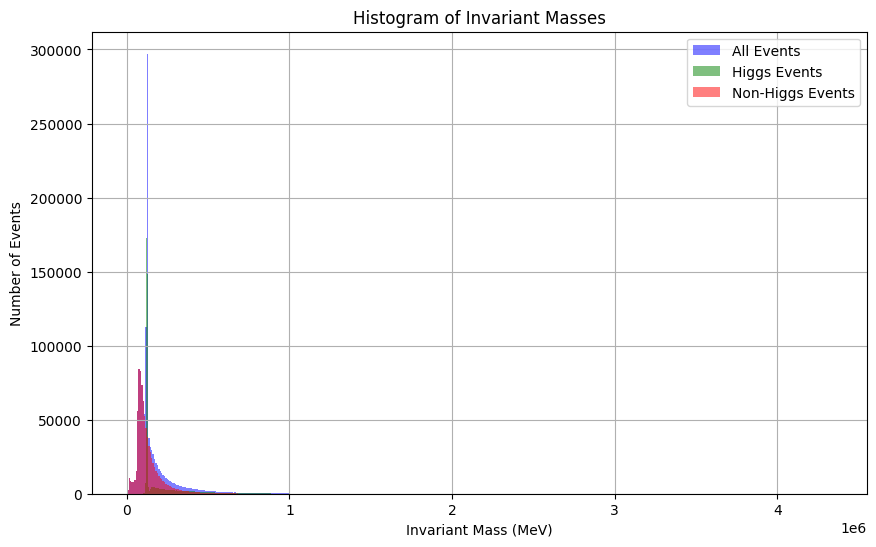

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `expanded_df` is your DataFrame with a 'totalInvariantMass' column and 'isHiggs' labels

def plot_invariant_mass_histogram(df, bins=500):
    """
    Plots a histogram of the invariant masses with separate histograms for Higgs and non-Higgs events.

    :param df: The DataFrame containing the 'totalInvariantMass' and 'isHiggs' columns.
    """
    # Filter the DataFrame for Higgs and non-Higgs events
    higgs_df = df[df['isHiggs'] == 1]
    non_higgs_df = df[df['isHiggs'] == 0]

    # Plot histograms
    plt.figure(figsize=(10, 6))

    # Histogram for all events
    plt.hist(df['totalInvariantMass'].dropna(), bins=bins, alpha=0.5, label='All Events', color='blue')

    # Histogram for Higgs events
    plt.hist(higgs_df['totalInvariantMass'].dropna(), bins=bins, alpha=0.5, label='Higgs Events', color='green')

    # Histogram for non-Higgs events
    plt.hist(non_higgs_df['totalInvariantMass'].dropna(), bins=bins, alpha=0.5, label='Non-Higgs Events', color='red')

    # Plot formatting
    plt.xlabel('Invariant Mass (MeV)')
    plt.ylabel('Number of Events')
    plt.title('Histogram of Invariant Masses')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Show the plot
    plt.show()

# Plot the histogram using the function
plot_invariant_mass_histogram(expanded_df)


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `expanded_df` is your DataFrame

# Step 1: Separate the non-Higgs events
non_higgs_df = expanded_df[expanded_df['isHiggs'] == 0]

# Step 2: Split the non-Higgs data into training/validation set and test set
non_higgs_train_df, test_df = train_test_split(non_higgs_df, test_size=0.2, random_state=42)

# Step 3: Combine the non-Higgs training/validation set with the original Higgs events
train_df = pd.concat([expanded_df[expanded_df['isHiggs'] == 1], non_higgs_train_df])

# Step 4: Verify the split
print("Training/Validation DataFrame:")
print(train_df.head())

print("\nTest DataFrame (Non-Higgs events only):")
print(test_df.head())

# Optionally, save the test DataFrame for later use
test_output_file = "test_non_higgs_dataframe.csv"
test_df.to_csv(test_output_file, index=False)
print(f"Test DataFrame with non-Higgs events written to {test_output_file}.")

# Optionally, save the training/validation DataFrame for use in training
train_output_file = "train_higgs_and_non_higgs_dataframe.csv"
train_df.to_csv(train_output_file, index=False)
print(f"Training/Validation DataFrame with Higgs and non-Higgs events written to {train_output_file}.")


Training/Validation DataFrame:
    eventNumber  scaleFactor_PILEUP  scaleFactor_PhotonTRIGGER  trigE  trigM  \
0       4246580            0.696077                   0.995786  False  False   
2         56490            1.214122                   1.005498  False  False   
4       3977190            0.750880                   1.002282  False  False   
7        375365            0.187531                   0.978654  False  False   
11       125352            1.251332                   1.000458  False  False   

    trigP  lep_n        met_et   met_phi  jet_n  ...  jet_pt_syst10  \
0    True      0  51045.160156  2.794363      3  ...            0.0   
2    True      0  58347.421875 -0.033184      3  ...            0.0   
4    True      0  43917.437500 -1.083709      1  ...            0.0   
7    True      0  30531.507812  0.860157      2  ...            0.0   
11   True      0  58828.941406 -1.128013      1  ...            0.0   

    jet_pt_syst11  jet_pt_syst12  jet_pt_syst13  jet_pt_syst1

In [21]:
def higgs_ratio(df):
    return sum(df.isHiggs) / len(df)

In [16]:
train_df = pd.read_csv("train_higgs_and_non_higgs_dataframe.csv").map(lambda x: float(bool(x)) if x in ["True", "False"] else float(x))

C:\Users\phgil\AppData\Local\Temp\ipykernel_22684\1434935774.py:1: DtypeWarning: Columns (16,17,18,19,21,22,23,53,54,55,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,200,201,202,203,204,208,209,233,234) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train_higgs_and_non_higgs_dataframe.csv").map(lambda x: float(bool(x)) if x in ["True", "False"] else float(x))


In [58]:
print(higgs_ratio(train_df))
import numpy as np

import pandas as pd
import numpy as np
import pandas as pd
import pandas as pd

def apply_strict_higgs_filters(df):
    """
    Applies stricter filters to the dataframe to select events from all Higgs boson decay channels.
    
    Parameters:
        df (pd.DataFrame): The input dataframe containing events with relevant columns.
        
    Returns:
        pd.DataFrame: The filtered dataframe with events satisfying the stricter filter criteria.
    """
    
    # Tighten photon selection: pT > 40 GeV, eta within 2.37 excluding barrel-endcap transition region, tighter isolation
    df_photon = df[
        (df['photon_n'] >= 2) &
        (df['photon_isTightID0'] == 1) & (df['photon_isTightID1'] == 1) & 
        (df['photon_pt0'] > 40000) & (df['photon_pt1'] > 40000) &
        (abs(df['photon_eta0']) < 2.37) & ((abs(df['photon_eta0']) < 1.37) | (abs(df['photon_eta0']) > 1.52)) &
        (abs(df['photon_eta1']) < 2.37) & ((abs(df['photon_eta1']) < 1.37) | (abs(df['photon_eta1']) > 1.52)) &
        (df['photon_ptcone300'] < 3000) & (df['photon_etcone200'] < 3000)
    ]
    
    # Higgs -> ZZ* -> 4 leptons filter: stricter lepton selection (pT thresholds increased)
    df_4lep = df[
        (df['lep_n'] == 4) &
        (df['lep_isTightID0'] == 1) & (df['lep_isTightID1'] == 1) &
        (df['lep_pt0'] > 20000) & (df['lep_pt1'] > 15000) &
        (df['ditau_m'] > 85000) & (df['ditau_m'] < 95000)
    ]
    
    # Higgs -> WW* -> eνμν filter: stricter lepton selection (pT cuts), possibly neutrino final states
    df_2lep = df[
        (df['lep_n'] == 2) &
        (df['lep_isTightID0'] == 1) & (df['lep_isTightID1'] == 1) &
        (df['lep_pt0'] > 25000) & (df['lep_pt1'] > 20000)
    ]
    
    # Hadronic decay channels (H -> bb, H -> ττ) filter: more stringent jet selection
    df_hadronic = df[
        (df['jet_n'] >= 2) &
        (df['jet_pt0'] > 40000) & (df['jet_pt1'] > 40000)
        # Removed b-tagging condition as jet_btag0 and jet_btag1 are not present
    ]
    
    # Stricter Missing Transverse Energy (MET) filter for channels with neutrinos
    df_met = df[
        (df['met_et'] > 60000) & (df['met_et'] < 100000)  # Tighten MET range
    ]
    
    # Combine all filtered dataframes and remove duplicates
    df_combined = pd.concat([df_photon, df_4lep, df_2lep, df_hadronic, df_met]).drop_duplicates()
    # df_combined = df_photon
    return df_combined




# Example usage:
# df_filtered = apply_higgs_filters(df)

print(len(train_df))
# Assuming `train_df` is your DataFrame
filtered_df = apply_strict_higgs_filters(train_df)
print(len(filtered_df))
# Show the first few rows of the filtered DataFrame
print(filtered_df.head())
print(higgs_ratio(filtered_df))


0.42421856776300443
1166064
526711
   eventNumber  scaleFactor_PILEUP  scaleFactor_PhotonTRIGGER  trigE  trigM  \
0    4246580.0            0.696076                   0.995786    0.0    0.0   
2    3977190.0            0.750880                   1.002282    0.0    0.0   
3     375365.0            0.187531                   0.978654    0.0    0.0   
5    3453636.0            1.745631                   0.985973    0.0    0.0   
7    4128997.0            0.696076                   0.981388    0.0    0.0   

   trigP  lep_n     met_et   met_phi  jet_n  ...  jet_pt_syst10  \
0    1.0    0.0  51045.160  2.794363    3.0  ...            0.0   
2    1.0    0.0  43917.438 -1.083709    1.0  ...            0.0   
3    1.0    0.0  30531.508  0.860157    2.0  ...            0.0   
5    1.0    0.0  63740.543  2.718296    2.0  ...            0.0   
7    1.0    0.0  19034.055  2.155104    1.0  ...            0.0   

   jet_pt_syst11  jet_pt_syst12  jet_pt_syst13  jet_pt_syst14  jet_pt_syst15  \
0      

In [23]:
filtered_df = filtered_df.astype(float)

In [65]:
import sys
import pandas as pd

def print_memory_usage(n=10, scope=None):
    """
    Prints the variables that take the most memory in the provided scope.

    Parameters:
    n (int): The number of top variables to print. Default is 10.
    scope (dict): The scope from which to measure memory usage, typically locals() or globals().
    """
    if scope is None:
        scope = globals()  # Default to the global scope if none provided

    # Calculate the size of each variable in the provided scope
    memory_usage = {var: sys.getsizeof(value) for var, value in scope.items()}

    # Sort variables by memory usage in descending order
    sorted_memory_usage = sorted(memory_usage.items(), key=lambda item: item[1], reverse=True)

    print(f"Top {n} variables by memory usage:")
    for var, size in sorted_memory_usage[:n]:
        print(f"{var}: {size} bytes")

# Call the function from the global scope
print_memory_usage(n=10, scope=globals())


Top 10 variables by memory usage:
train_df: 3725574512 bytes
non_higgs_df: 2681397392 bytes
non_higgs_train_df: 2145116642 bytes
combined_df: 1038349996 bytes
data_df: 623541838 bytes
test_df: 536280782 bytes
mc_df: 414808762 bytes
train_df_sampled: 256535432 bytes
X: 254669720 bytes
X_train: 203734472 bytes


In [66]:
del non_higgs_df
del combined_df
del data_df
del test_df
del mc_df

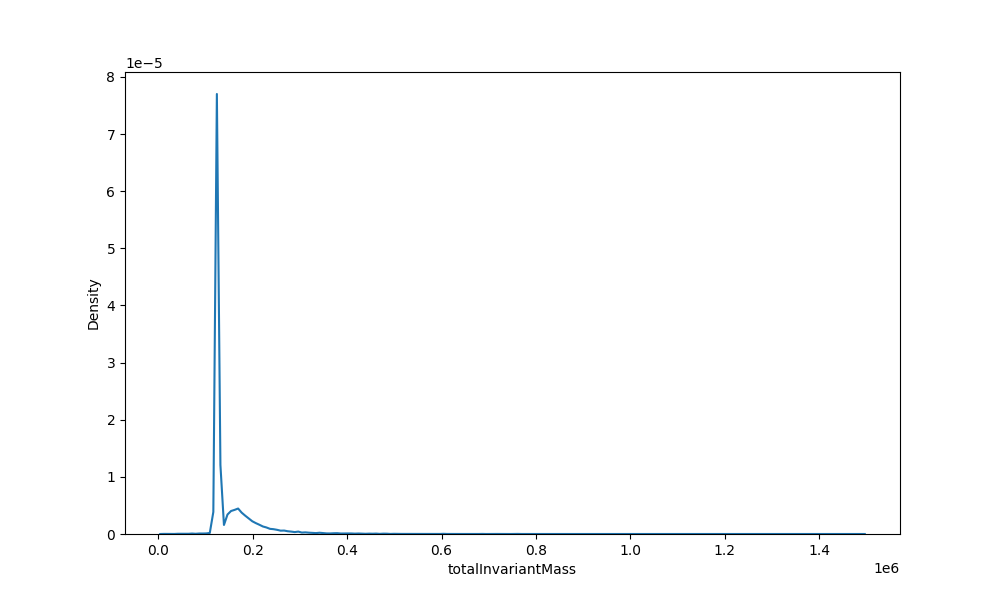

In [85]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib widget
plt.clf()
sn.kdeplot(filtered_df[filtered_df.isHiggs==1].totalInvariantMass, bw_adjust=.25)
# plt.xlim(100000, 150000)
plt.show()

In [75]:
higgs_suspected = filtered_df[filtered_df.isHiggs==0].totalInvariantMass

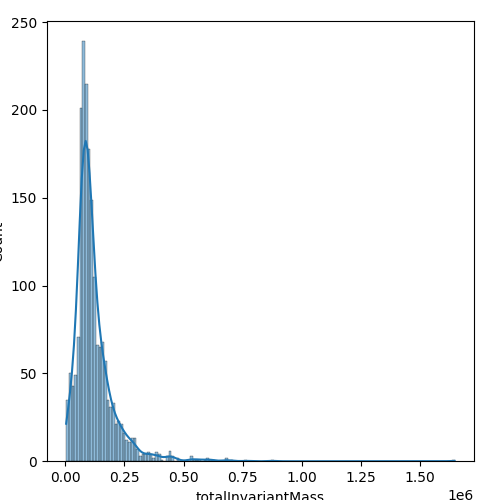

In [77]:
plt.clf()
sn.histplot(higgs_suspected, kde=True)
plt.show()

Expected number of background events in Higgs mass window: 6575.9510586132255
95% Confidence Interval: [6417.0, 6735.0]
Observed number of events in Higgs mass window: 7003
P-value: 9.611494821809901e-08
Significance (in sigma): 5.206698643847132


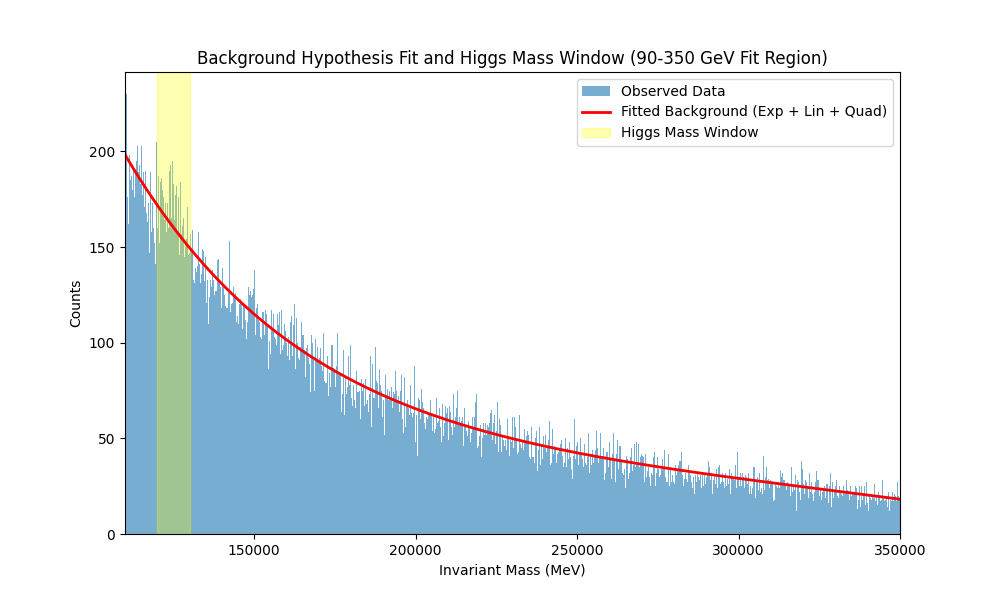

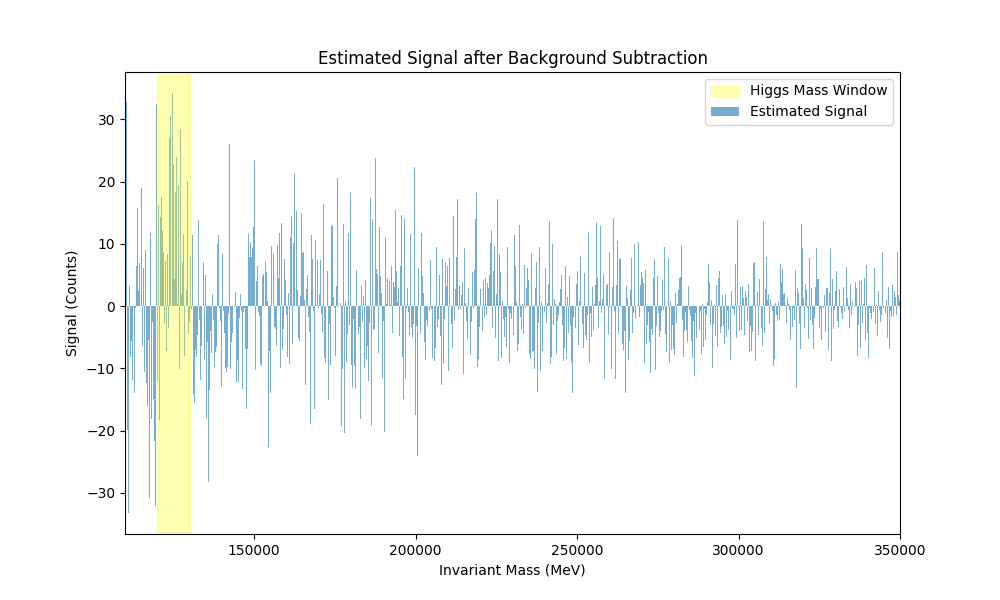

In [73]:
import numpy as np
from scipy.stats import poisson, norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Custom function: exponential with linear and quadratic terms
def exp_lin_quad(x, a, b, c, d):
    return a * np.exp(-b * x) + c * x + d * x**2

# Assuming you have a list or array of masses in MeV
masses = filtered_df[filtered_df.isHiggs==0 | (filtered_df.index % 500 == 1)].totalInvariantMass  # Replace with your actual list of masses

# Define the fit region (90 GeV to 350 GeV in MeV)
fit_lower_bound = 110000  # 90 GeV in MeV
fit_upper_bound = 350000  # 350 GeV in MeV

# Step 1: Filter data to be within the fit region
filtered_masses = [m for m in masses if fit_lower_bound <= m <= fit_upper_bound]

# Step 2: Fit an exponential with linear and quadratic terms to the filtered data
hist, bin_edges = np.histogram(filtered_masses, bins=1000, range=(fit_lower_bound, fit_upper_bound), density=False)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
popt, pcov = curve_fit(exp_lin_quad, bin_centers, hist, p0=(1e-5, 1e-5, 1e-12, 1e-18))

# Extract fitted parameters
a, b, c, d = popt

# Step 3: Define the Higgs mass window (100,000 - 150,000 MeV)
mass_lower_bound = 120000  # 100 GeV in MeV
mass_upper_bound = 130000  # 150 GeV in MeV

# Calculate the expected number of background events in the Higgs mass window
expected_background_counts = np.sum([exp_lin_quad(x, a, b, c, d) for x in bin_centers if mass_lower_bound <= x <= mass_upper_bound])

# 95% confidence interval for the expected background events
ci_lower = poisson.ppf(0.025, expected_background_counts)
ci_upper = poisson.ppf(0.975, expected_background_counts)

# Print the expected background events and the confidence interval
print(f"Expected number of background events in Higgs mass window: {expected_background_counts}")
print(f"95% Confidence Interval: [{ci_lower}, {ci_upper}]")

# Count the number of observed events in the Higgs mass window
observed_higgs_counts = np.sum((np.array(filtered_masses) >= mass_lower_bound) & (np.array(filtered_masses) <= mass_upper_bound))

print(f"Observed number of events in Higgs mass window: {observed_higgs_counts}")

# Step 4: Perform a hypothesis test
# Assuming the number of events follows a Poisson distribution
p_value = poisson.sf(observed_higgs_counts - 1, expected_background_counts)

# Step 5: Calculate the significance (sigma)
sigma = norm.isf(p_value)

print(f"P-value: {p_value}")
print(f"Significance (in sigma): {sigma}")
plt.clf()

# Step 6: Plot the histogram with the fitted background model (90,000 to 350,000 MeV)
plt.figure(figsize=(10, 6))
hist, bin_edges, _ = plt.hist(filtered_masses, bins=1000, density=False, alpha=0.6, label='Observed Data')  # Non-density mode
x = np.linspace(fit_lower_bound, fit_upper_bound, 1000)
plt.plot(x, exp_lin_quad(x, *popt), 'r-', lw=2, label='Fitted Background (Exp + Lin + Quad)')
plt.axvspan(mass_lower_bound, mass_upper_bound, color='yellow', alpha=0.3, label='Higgs Mass Window')
plt.xlabel('Invariant Mass (MeV)')
plt.ylabel('Counts')
plt.title('Background Hypothesis Fit and Higgs Mass Window (90-350 GeV Fit Region)')
plt.legend()
plt.xlim(fit_lower_bound, fit_upper_bound)
plt.show()

# Step 7: Calculate the estimated background for each bin and subtract it to get the signal
background_estimate = exp_lin_quad(bin_centers, *popt)

# Calculate the signal as the difference between observed counts and estimated background
signal_estimate = hist - background_estimate

# Step 8: Plot the estimated signal
plt.figure(figsize=(10, 6))

# Plot the signal estimate (data minus background)
plt.bar(bin_centers, signal_estimate, width=np.diff(bin_edges), align='center', alpha=0.6, label='Estimated Signal')

# Highlight the Higgs mass window
plt.axvspan(mass_lower_bound, mass_upper_bound, color='yellow', alpha=0.3, label='Higgs Mass Window')

# Labels and title
plt.xlabel('Invariant Mass (MeV)')
plt.ylabel('Signal (Counts)')
plt.title('Estimated Signal after Background Subtraction')

# Display legend and plot limits
plt.legend()
plt.xlim(fit_lower_bound, fit_upper_bound)

# Show the plot
plt.show()


In [19]:
list(train_df.columns)

['eventNumber',
 'scaleFactor_PILEUP',
 'scaleFactor_PhotonTRIGGER',
 'trigE',
 'trigM',
 'trigP',
 'lep_n',
 'met_et',
 'met_phi',
 'jet_n',
 'photon_n',
 'tau_n',
 'ditau_m',
 'met_et_syst',
 'largeRjet_n',
 'isHiggs',
 'lep_truthMatched0',
 'lep_truthMatched1',
 'lep_truthMatched2',
 'lep_truthMatched3',
 'lep_trigMatched0',
 'lep_trigMatched1',
 'lep_trigMatched2',
 'lep_trigMatched3',
 'lep_pt0',
 'lep_pt1',
 'lep_pt2',
 'lep_pt3',
 'lep_eta0',
 'lep_eta1',
 'lep_eta2',
 'lep_eta3',
 'lep_phi0',
 'lep_phi1',
 'lep_phi2',
 'lep_phi3',
 'lep_E0',
 'lep_E1',
 'lep_E2',
 'lep_E3',
 'lep_z00',
 'lep_z01',
 'lep_z02',
 'lep_z03',
 'lep_charge0',
 'lep_charge1',
 'lep_charge2',
 'lep_charge3',
 'lep_type0',
 'lep_type1',
 'lep_type2',
 'lep_type3',
 'lep_isTightID0',
 'lep_isTightID1',
 'lep_isTightID2',
 'lep_isTightID3',
 'lep_ptcone300',
 'lep_ptcone301',
 'lep_ptcone302',
 'lep_ptcone303',
 'lep_etcone200',
 'lep_etcone201',
 'lep_etcone202',
 'lep_etcone203',
 'lep_trackd0pvunbiased